<a href="https://colab.research.google.com/github/paddoum/Dessin/blob/main/Dessin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/abey79/vsketch#egg=vsketch[colab]

DEPRECATION: git+https://github.com/abey79/vsketch#egg=vsketch[colab] contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
  Cloning https://github.com/abey79/vsketch to /tmp/pip-install-6qmt0pcj/vsketch_7b296552d8e04148bbcd2d7cf26f38c3
  Running command git clone --filter=blob:none --quiet https://github.com/abey79/vsketch /tmp/pip-install-6qmt0pcj/vsketch_7b296552d8e04148bbcd2d7cf26f38c3
  Resolved https://github.com/abey79/vsketch to commit 7a268ed9caee9a01b6f0cc791f82f98f5cfc8971
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 530.7/530.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

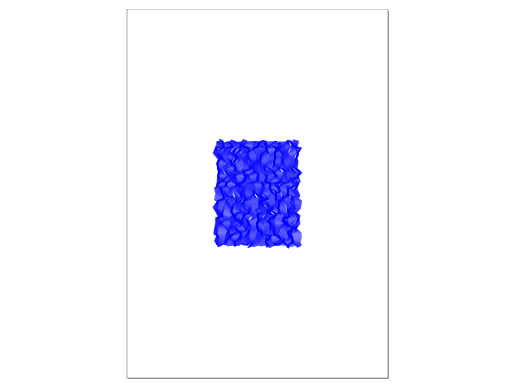

In [16]:
import vsketch
import numpy as np


vsk = vsketch.Vsketch()
vsk.size("a1", landscape=False)
vsk.scale("cm")

allColumnsPoints =  []
for row in range(20):
  columnPoints = []
  for col in range(25):
      x = row + vsk.random(1.5)
      y = col + vsk.random(1)
      columnPoints.append((x,y))
  allColumnsPoints.append(columnPoints)

for index in range(len(allColumnsPoints) -1):
  currentColumnPoints = allColumnsPoints[index]
  nextColumnPoints = allColumnsPoints[index+1]

  currentColumnPointsUnzipped = zip(*currentColumnPoints)
  currentColumnPointsUnzipped = list(currentColumnPointsUnzipped)
  xTuples = currentColumnPointsUnzipped[0]
  yTuples = currentColumnPointsUnzipped[1]
  xCoordinatesCurrentColumn = np.array(xTuples)
  yCoordinatesCurrentColumn = np.array(yTuples)

  nextColumnPointsUnzipped = zip(*nextColumnPoints)
  nextColumnPointsUnzipped = list(nextColumnPointsUnzipped)
  xTuples = nextColumnPointsUnzipped[0]
  yTuples = nextColumnPointsUnzipped[1]
  xCoordinatesNextColumn = np.array(xTuples)
  CoordinatesNextColumn = np.array(yTuples)

  interpolation_steps = 9

  for interpolation_step in range(interpolation_steps):
    interpolated_x = vsk.lerp(xCoordinatesCurrentColumn, xCoordinatesNextColumn, interpolation_step/interpolation_steps)
    interpolated_y = vsk.lerp(yCoordinatesCurrentColumn, yCoordinatesNextColumn, interpolation_step/interpolation_steps)
    interpolated_coordinates = zip(interpolated_x, interpolated_y)
    vsk.polygon(interpolated_coordinates)


vsk.vpype("linemerge linesimplify reloop linesort")
vsk.display()
vsk.save("detail.svg")

